In [1]:
%load_ext watermark

ModuleNotFoundError: No module named 'watermark'

In [2]:
%watermark -a 'Sebastian Raschka' -d -v -p matplotlib,numpy

UsageError: Line magic function `%watermark` not found.


## Example Data

In [5]:
import numpy as np
ary = np.array([[ 0.76223776,  0.71328671,  0.87412587,  0.77408175,  0.79020979,
         0.67132867,  0.70629371],
       [ 0.69230769,  0.29772375,  0.79020979,  0.55789817,  0.51748252,
         0.69230769,  0.58741259],
       [ 0.32167832,  0.2253577 ,  0.36363636,  0.55944056, -0.3006993 ,
         0.07692308,  0.37062937],
       [ 0.57142857,        0,  0.57142857,  0.81084372,  0.85714286,
         0.53571429,  0.42857143],
       [ 0.38461538,  0.35164835,  0.7032967 ,  0.64835165,  0.52747253,
         0.52747253,  0.54395604],
       [ 0.42892157,  0.58840274,  0.83823529,  0.81054583,  0.88480392,
         0.56127451,  0.79901961],
       [ 0.78571429,  0.28571429,  0.57142857,  0.32142857,  0.53571429,
         0.67857143,  0.71428571],
       [ 0.51648352,  0.86813187,  0.85714286,  0.81818492,  0.73626374,
         0.5989011 ,  0.48901099],
       [ 0.59803922, -0.01470588,  0.56617647,  0.91911765,  0.72303922,
         0.3995098 ,  0.37254902],
       [ 0.69090909,  0.22779102,  0.43636364,  0.44545455, -0.27272727,
         0.13636364,  0.02727273],
       [ 0.40970072,  0.55343322,  0.51702786,  0.8121775 ,  0.8369453 ,
         0.78534572,  0.72342621]])

## Boxplot Notch problem

It appears that the notches are incorrectly drawn...

In [6]:
%matplotlib inline

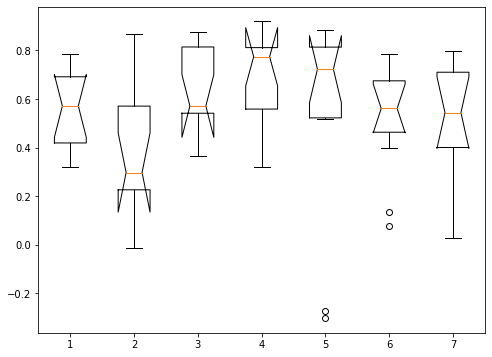

In [7]:
import matplotlib.pyplot as plt

def boxplot1(data):

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    bplot = plt.boxplot(data, 
            notch=True,          # notch shape 
            vert=True,           # vertical box aligmnent
            )   

    plt.show()
boxplot1(ary)

## Boxplot without Notch

This problem does not occur in the regular rectangular shape.

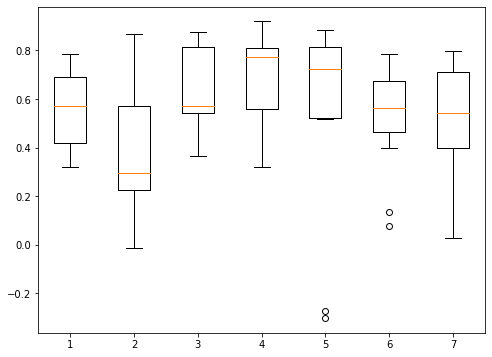

In [11]:
def boxplot2(data):

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    bplot = plt.boxplot(data, 
            #notch=True,          # notch shape 
            vert=True,           # vertical box aligmnent
            )   

    plt.show()
boxplot2(ary)

## This behavior is correct!

From [Wikipedia](http://en.wikipedia.org/wiki/Box_plot):

> Notched box plots apply a "notch" or narrowing of the box around the median. Notches are useful in offering a rough guide to significance of difference of medians; if the notches of two boxes do not overlap, this offers evidence of a statistically significant difference between the medians. The width of the notches is proportional to the interquartile range of the sample and inversely proportional to the square root of the size of the sample. However, there is uncertainty about the most appropriate multiplier (as this may vary depending on the similarity of the variances of the samples). One convention is to use +/-1.58*IQR/sqrt(n).

This was also discussed in an [issue on GitHub](https://github.com/matplotlib/matplotlib/issues/3631#issuecomment-58684973); R produces a similar output as evidence that this behaviour is "correct."

Thus, if we have this weird "flipped" appearance in the notched box plots, it simply means that the 1st quartile has a lower value than the confidence of the mean and vice versa for the 3rd quartile. Although it looks ugly, it's actually useful information that about the (un)confidence of the median. We can do a bootstrapping (random sampling with replacement to estimate parameters of a sampling distribution, here: confidence intervals).



From the `plt.boxplot` documentation:

> bootstrap : None (default) or integer
    Specifies whether to bootstrap the confidence intervals
    around the median for notched boxplots. If bootstrap==None,
    no bootstrapping is performed, and notches are calculated
    using a Gaussian-based asymptotic approximation  (see McGill, R.,
    Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart,
    1967). Otherwise, bootstrap specifies the number of times to
    bootstrap the median to determine it's 95% confidence intervals.
    Values between 1000 and 10000 are recommended.

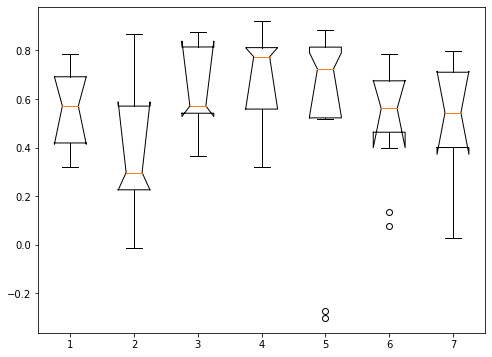

In [13]:
def boxplot3(data):

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    bplot = plt.boxplot(data, 
            notch=True,          # notch shape 
            vert=True,           # vertical box aligmnent
            bootstrap=50
            )   

    plt.show()
boxplot3(ary)